In [19]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [20]:
(X_entrenamiento, Y_entrenamiento), (X_pruebas, Y_pruebas) = mnist.load_data()

class_names = ['Cero', 'Uno', 'Dos', 'Tres', 'Cuatro', 'Cinco', 'Seis', 'Siete', 'Ocho', 'Nueve']

#Colocar los datos en la forma correcta que ya hemos visto (1, 28, 28, 1)
X_entrenamiento = X_entrenamiento.reshape(X_entrenamiento.shape[0], 28, 28, 1)
X_pruebas = X_pruebas.reshape(X_pruebas.shape[0], 28, 28, 1)

#Hacer 'one-hot encoding' de los resultados (e.g. en lugar de tener como resultado una sola neurona, tendre 10 donde solo el resultado correcto sera 1 y el resto 0)
Y_entrenamiento = to_categorical(Y_entrenamiento)
Y_pruebas = to_categorical(Y_pruebas)

#Convertir a flotante y normalizar para que aprenda mejor la red
X_entrenamiento = X_entrenamiento.astype('float32') / 255
X_pruebas = X_pruebas.astype('float32') / 255

In [21]:
#Aumento de datos
#Variables para controlar las transformaciones que se haran en el aumento de datos
#utilizando ImageDataGenerator de keras

rango_rotacion = 30
mov_ancho = 0.25
mov_alto = 0.25
#rango_inclinacion=15 #No uso este de momento pero si quieres puedes probar usandolo!
rango_acercamiento=[0.5,1.5]

datagen = ImageDataGenerator(
    rotation_range = rango_rotacion,
    width_shift_range = mov_ancho,
    height_shift_range = mov_alto,
    zoom_range=rango_acercamiento,
    #shear_range=rango_inclinacion #No uso este de momento pero si quieres puedes probar usandolo!
)

datagen.fit(X_entrenamiento)


In [22]:
#Modelo!
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [23]:
#Compilación
modelo.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', 'mae', 'mse'])

In [24]:
#Los datos para entrenar saldran del datagen, de manera que sean generados con las transformaciones que indicamos
data_gen_entrenamiento = datagen.flow(X_entrenamiento, Y_entrenamiento, batch_size=32)

In [25]:
TAMANO_LOTE = 32

#Entrenar la red.
print("Entrenando modelo...");
epocas=60
history = modelo.fit(
    data_gen_entrenamiento,
    epochs=epocas,
    batch_size=TAMANO_LOTE,
    validation_data=(X_pruebas, Y_pruebas),
    steps_per_epoch=int(np.ceil(60000 / float(TAMANO_LOTE))),
    validation_steps=int(np.ceil(10000 / float(TAMANO_LOTE)))
)

print("Modelo entrenado!");

Entrenando modelo...
Epoch 1/60
1875/1875 [==============================] - 25s 13ms/step - loss: 1.1994 - accuracy: 0.5982 - mae: 0.1086 - mse: 0.0525 - val_loss: 0.1684 - val_accuracy: 0.9560 - val_mae: 0.0201 - val_mse: 0.0071
Epoch 2/60
1875/1875 [==============================] - 25s 13ms/step - loss: 0.7082 - accuracy: 0.7718 - mae: 0.0674 - mse: 0.0325 - val_loss: 0.1221 - val_accuracy: 0.9637 - val_mae: 0.0138 - val_mse: 0.0056
Epoch 3/60
1875/1875 [==============================] - 24s 13ms/step - loss: 0.5957 - accuracy: 0.8067 - mae: 0.0569 - mse: 0.0276 - val_loss: 0.1053 - val_accuracy: 0.9669 - val_mae: 0.0108 - val_mse: 0.0050
Epoch 4/60
1875/1875 [==============================] - 25s 13ms/step - loss: 0.5281 - accuracy: 0.8297 - mae: 0.0501 - mse: 0.0246 - val_loss: 0.1128 - val_accuracy: 0.9655 - val_mae: 0.0115 - val_mse: 0.0052
Epoch 5/60
1875/1875 [==============================] - 29s 15ms/step - loss: 0.4893 - accuracy: 0.8420 - mae: 0.0466 - mse: 0.0229 - val_l

1875/1875 [==============================] - 42s 23ms/step - loss: 0.2985 - accuracy: 0.9035 - mae: 0.0279 - mse: 0.0142 - val_loss: 0.0516 - val_accuracy: 0.9828 - val_mae: 0.0042 - val_mse: 0.0026
Epoch 40/60
1875/1875 [==============================] - 43s 23ms/step - loss: 0.2951 - accuracy: 0.9045 - mae: 0.0276 - mse: 0.0140 - val_loss: 0.0614 - val_accuracy: 0.9806 - val_mae: 0.0047 - val_mse: 0.0029
Epoch 41/60
1875/1875 [==============================] - 43s 23ms/step - loss: 0.2927 - accuracy: 0.9055 - mae: 0.0273 - mse: 0.0139 - val_loss: 0.0549 - val_accuracy: 0.9823 - val_mae: 0.0045 - val_mse: 0.0027
Epoch 42/60
1875/1875 [==============================] - 41s 22ms/step - loss: 0.2865 - accuracy: 0.9081 - mae: 0.0267 - mse: 0.0136 - val_loss: 0.0614 - val_accuracy: 0.9806 - val_mae: 0.0051 - val_mse: 0.0030
Epoch 43/60
1875/1875 [==============================] - 40s 21ms/step - loss: 0.2876 - accuracy: 0.9077 - mae: 0.0269 - mse: 0.0136 - val_loss: 0.0572 - val_accuracy: 

In [48]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoca')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'], label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'], label = 'Val Error')
  plt.legend()

  plt.figure()
  plt.xlabel('Epoca')
  plt.ylabel('Media de Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'], label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
  plt.legend()
    
  plt.figure()
  plt.xlabel('Epoca')
  plt.ylabel('Media de Precisión')
  plt.plot(hist['epoch'], hist['accuracy'], label='Train Error')
  plt.plot(hist['epoch'], hist['val_accuracy'], label = 'Val Error')
  plt.legend()
    
  plt.figure()
  plt.xlabel('Epoca')
  plt.ylabel('Magnitud de pérdida')
  plt.plot(hist['epoch'], hist['loss'], label='Pérdida')
  plt.plot(hist['epoch'], hist['val_loss'], label = 'Val pérdida')
  plt.legend()
  
  plt.show()


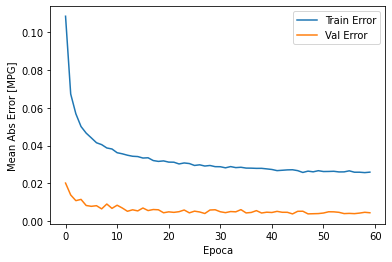

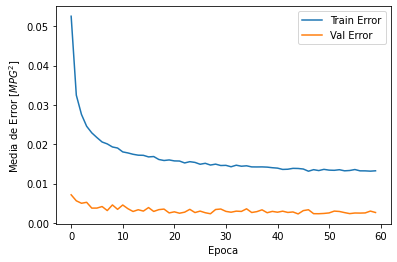

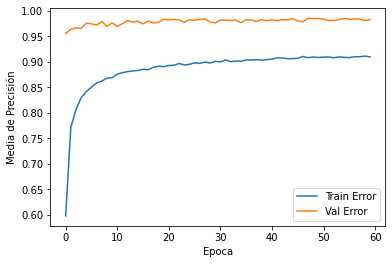

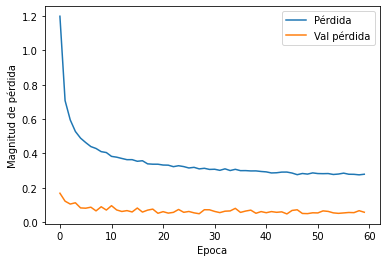

In [49]:
# Visor del entrenamiento
plot_history(history)

In [28]:
imagen = X_pruebas[777]
number = imagen
number = np.array([number])
prediccion = modelo.predict(number)

Predicción: Uno


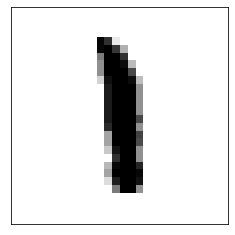

In [29]:

#Visor de la imagen a evaluar
plt.figure(figsize=(4, 4))
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.imshow(imagen, cmap=plt.cm.binary)
print("Predicción: " + class_names[np.argmax(prediccion[0])])
plt.show()

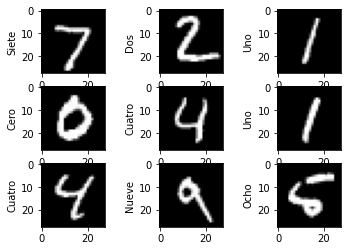

In [30]:
for i in range(9):
    number = X_pruebas[i]
    number = np.array([number])
    plt.subplot(330 + 1 + i)
    plt.imshow(X_pruebas[i], cmap=plt.get_cmap('gray'))
    prediccion = modelo.predict(number)
    plt.ylabel(class_names[np.argmax(prediccion[0])])
plt.show()

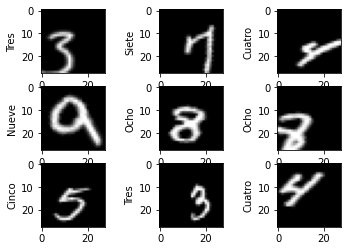

In [31]:
# imagenes alteradas
for i in range(9):
    imagen = data_gen_entrenamiento[0][0][i+i]
    number = imagen
    number = np.array([number])
    plt.subplot(330 + 1 + i)
    plt.imshow(imagen, cmap=plt.get_cmap('gray'))
    prediccion = modelo.predict(number)
    plt.ylabel(class_names[np.argmax(prediccion[0])])
plt.show()